### 모델
# 모델은 방정식과 같은것
# y = ax + b
# y는 예측값, x는 데이터값, a,b는 기계학습을 통한 가중치

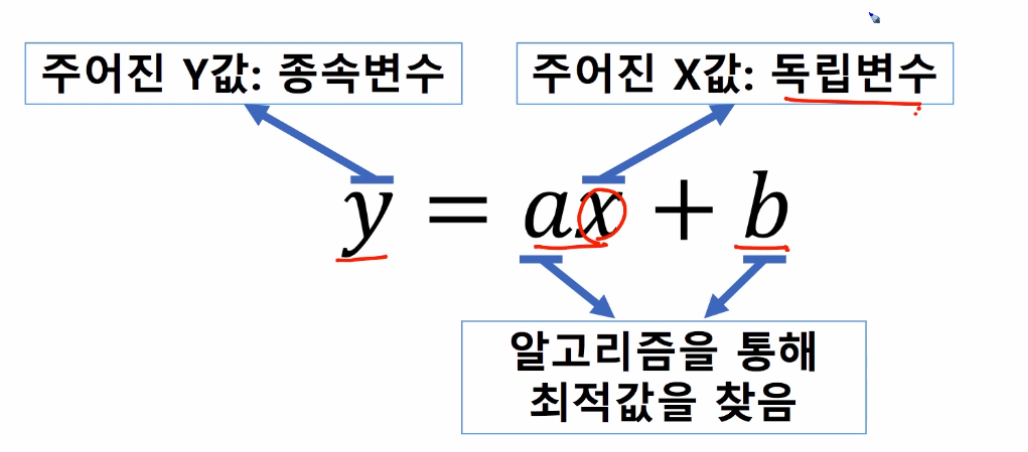

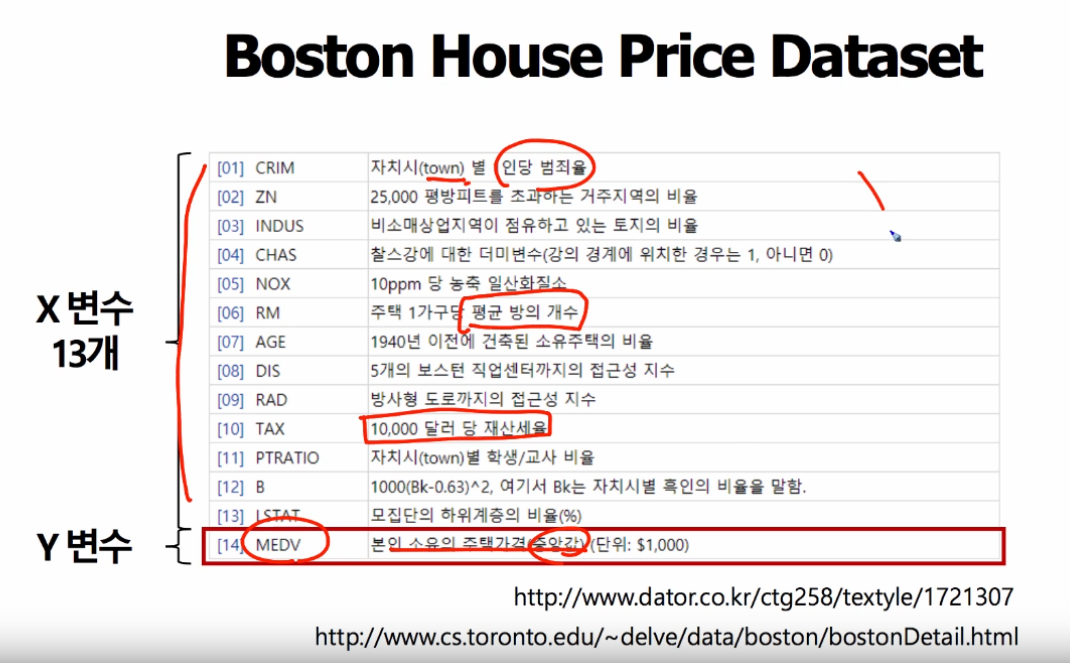

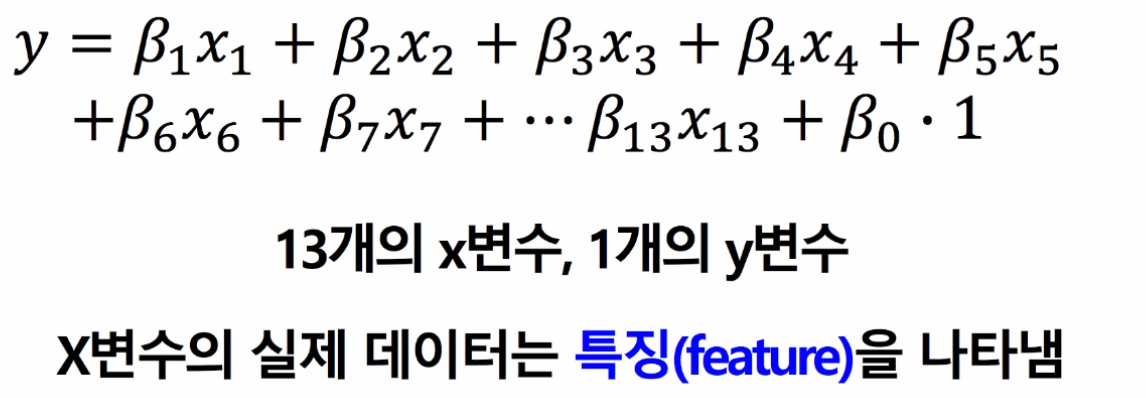
# feature는 컬럼값을 이야기함

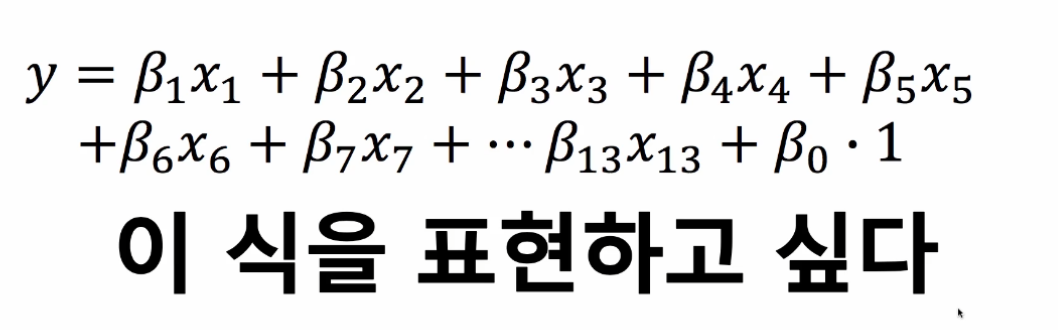

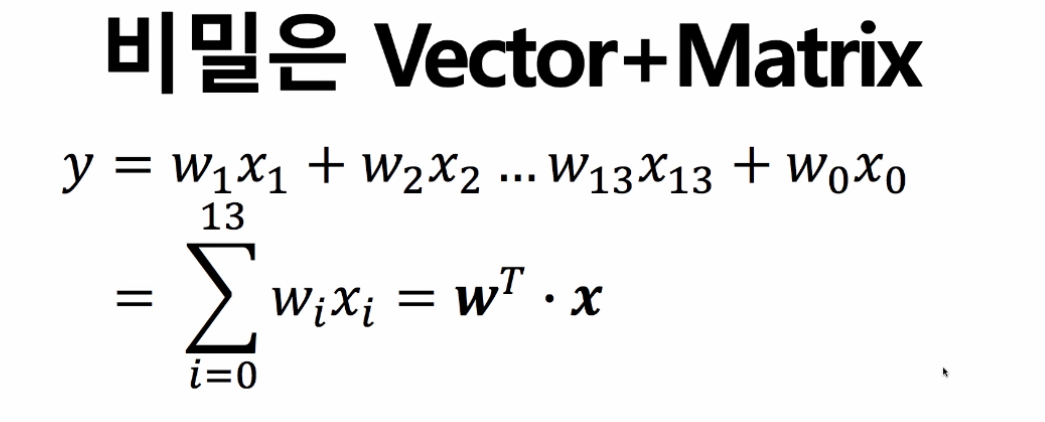

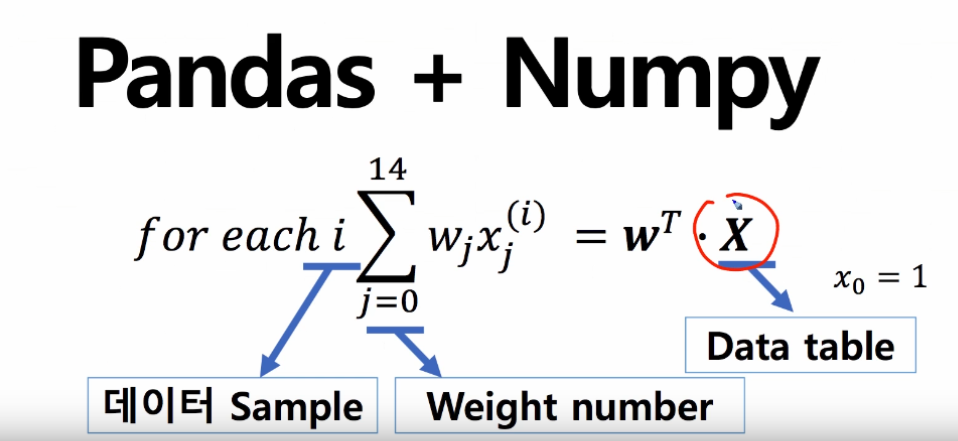

# 데이터 Sample은 data instance 즉 values
# weight 값은 기계학습을 통해 구해야하는 가중치
# x값은 데이터값으로 받을 수 있는 값

## pandas는 엑셀처럼 이용가능하게해주고, numpy는 array계산을 빠르게처리

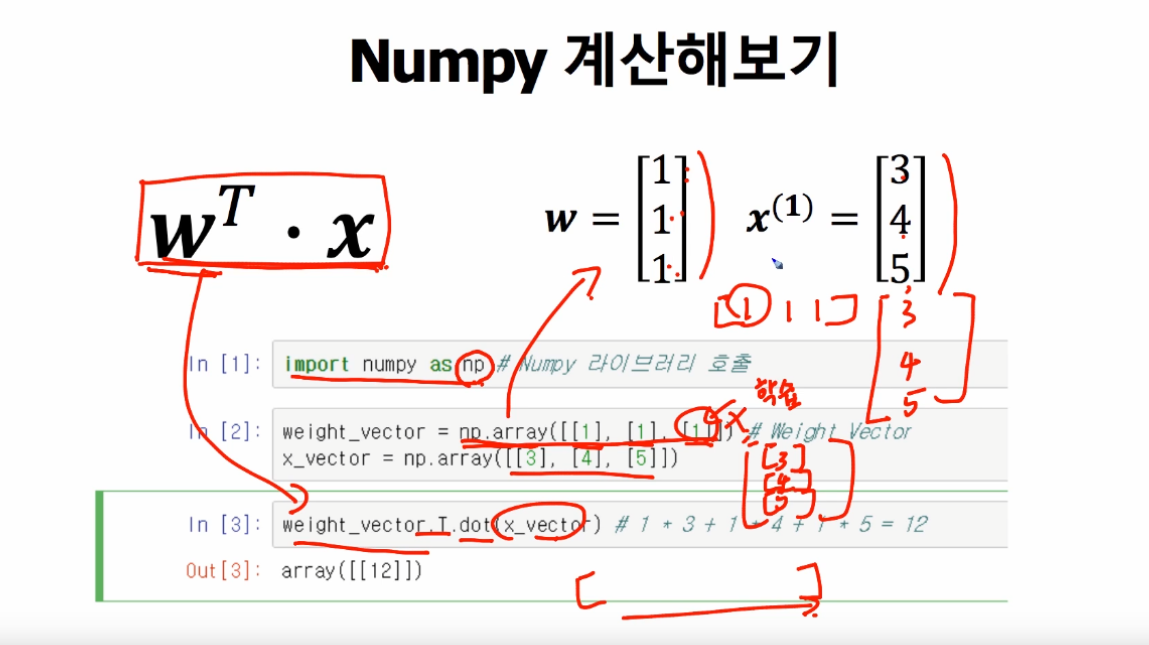

In [1]:
import numpy as np

In [2]:
weight_vector = np.array([[1],[1],[1]]) #가중치
x_vector = np.array([[3],[4],[5]])

In [4]:
weight_vector.T.dot(x_vector) # 1*3+1*4+1*5 = 12
#T는 transpose 열을 행을로 변환 dot은 곱하기

array([[12]])

### Pandas 데이터 로딩

In [5]:
import pandas as pd

In [14]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data' # data URL
df_data = pd.read_csv(data_url, sep='\s+', header =None) # csv타입 데이터로드, sep(seperate)은 빈공간으로 지정하고, column은 없음
df_data.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [15]:
df_data.values # 또는 df_data.as_matrix()도 같은 표현이다.

array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00, ...,
          3.96900000e+02,   4.98000000e+00,   2.40000000e+01],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          3.96900000e+02,   9.14000000e+00,   2.16000000e+01],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          3.92830000e+02,   4.03000000e+00,   3.47000000e+01],
       ..., 
       [  6.07600000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          3.96900000e+02,   5.64000000e+00,   2.39000000e+01],
       [  1.09590000e-01,   0.00000000e+00,   1.19300000e+01, ...,
          3.93450000e+02,   6.48000000e+00,   2.20000000e+01],
       [  4.74100000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          3.96900000e+02,   7.88000000e+00,   1.19000000e+01]])

In [16]:
df_data['weight_0'] = 1 #가중치의 0번째 값은 1로 다 만들어준다.
df_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,weight_0
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,1
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,1
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,1


In [17]:
df_data=df_data.drop("MEDV", axis=1) # 미디엄밸류(MEDV)를 떨궈냄 (Y값을 빼냄)
df_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,weight_0
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,1
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,1
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,1


In [18]:
# 전체 data의 갯수 보기
df_data.shape

(506, 14)

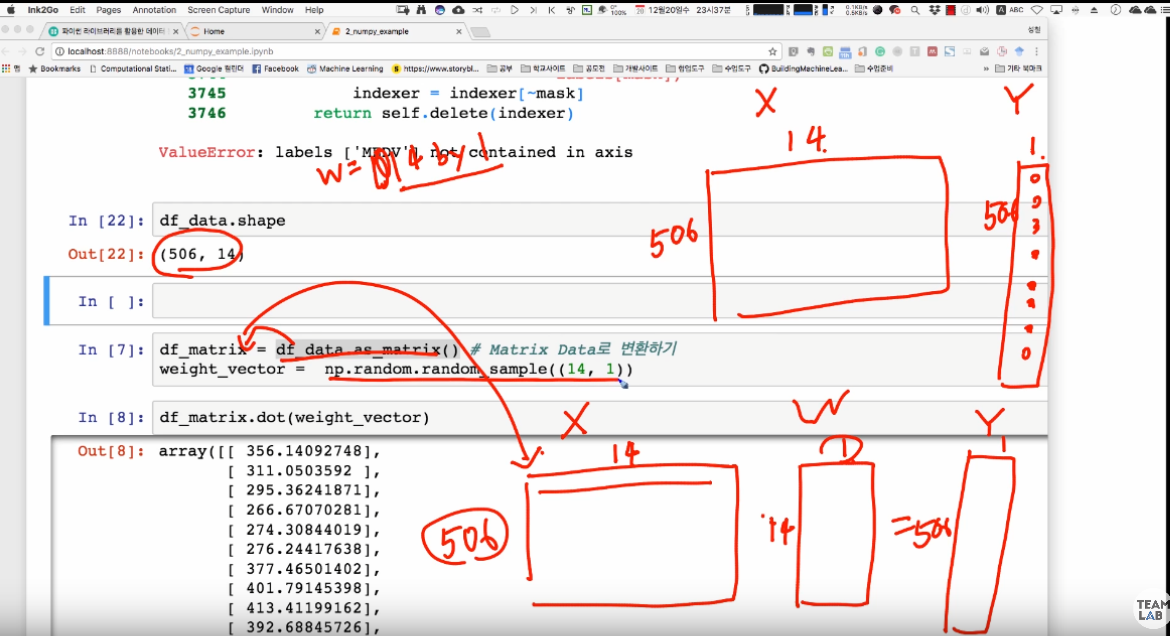

In [21]:
df_matrix = df_data.as_matrix() # matrix data로 변환하기
df_matrix

array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00, ...,
          3.96900000e+02,   4.98000000e+00,   1.00000000e+00],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          3.96900000e+02,   9.14000000e+00,   1.00000000e+00],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          3.92830000e+02,   4.03000000e+00,   1.00000000e+00],
       ..., 
       [  6.07600000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          3.96900000e+02,   5.64000000e+00,   1.00000000e+00],
       [  1.09590000e-01,   0.00000000e+00,   1.19300000e+01, ...,
          3.93450000e+02,   6.48000000e+00,   1.00000000e+00],
       [  4.74100000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          3.96900000e+02,   7.88000000e+00,   1.00000000e+00]])

In [24]:
weight_vector = np.random.random_sample((14,1)) # 임의의 가중치 이부분은 train합습이 되서 구해야하는 값이다.
weight_vector

array([[ 0.21970531],
       [ 0.06475393],
       [ 0.74901085],
       [ 0.97259205],
       [ 0.29625536],
       [ 0.36083505],
       [ 0.1514816 ],
       [ 0.6364608 ],
       [ 0.27878788],
       [ 0.35944718],
       [ 0.81300669],
       [ 0.05507566],
       [ 0.30708335],
       [ 0.44816147]])

In [27]:
df_matrix.dot(weight_vector) # Y값이다. Y는 예측값 예측값 506개가 나옴!

array([[ 160.85989984],
       [ 150.00038325],
       [ 145.78633041],
       [ 134.01933377],
       [ 136.21255342],
       [ 136.43692911],
       [ 174.26868613],
       [ 181.19090586],
       [ 184.42961421],
       [ 178.80838486],
       [ 181.420004  ],
       [ 177.49672332],
       [ 170.70120877],
       [ 174.28178391],
       [ 177.30343535],
       [ 173.29794868],
       [ 168.2444054 ],
       [ 178.46822686],
       [ 164.85481902],
       [ 175.40906311],
       [ 182.0002435 ],
       [ 179.51429537],
       [ 181.76023721],
       [ 183.14673433],
       [ 181.32353273],
       [ 175.04621504],
       [ 179.45174802],
       [ 176.10149315],
       [ 180.18835168],
       [ 178.41410903],
       [ 181.27821144],
       [ 180.29010832],
       [ 173.97583919],
       [ 179.74886449],
       [ 174.79051444],
       [ 161.80630516],
       [ 160.22763558],
       [ 157.82112474],
       [ 156.34330408],
       [ 146.1780124 ],
       [ 144.70610466],
       [ 134.161

In [26]:
(df_matrix.dot(weight_vector)).shape

(506, 1)